In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
plt.rc('font', family='AppleGothic')

# file upload
welfare = pd.read_csv('../data/welfare_python.csv', encoding = 'utf-8')
mpg = pd.read_csv('../data/mpg.csv', encoding = 'CP949')

# seaborn library

## 1. 한국 복지 패널 데이터
- jointplot
- barplot
- boxplot
- kdeplot

## 2. 자동차 데이터셋
- kdeplot + rugplot
- scatterplot
- histplot
- countplot
- jointplot
- pairplot
- heatmap
- barplot
- boxplot
- violinplot
- stripplot
- swarmplot
- boxpot + striplot
- violinplot + swarmplot


### 1. 한국 복지 패널 데이터

In [10]:
print(welfare.head())

   gender  birth  marriage  religion  code_job  income  code_religion
0       2   1936         2         2       NaN     NaN              1
1       2   1945         2         2       NaN     NaN              1
2       1   1948         2         2     942.0   120.0              1
3       1   1942         3         1     762.0   200.0              1
4       2   1923         2         1       NaN     NaN              1


In [11]:
# data preprocessing

# gender
welfare.loc[welfare['gender'] ==1, ['gender']] = '남성'
welfare.loc[welfare['gender'] ==2, ['gender']] = '여성'

# age 추가
thisyear = 2021
welfare['age'] = thisyear - welfare['birth'] +1

# marriage
def setMarriage(x):
    if x ==1 :
        return '결혼'
    elif x ==3 :
        return '이혼'
    else: # 결측치
        return '무응답'
welfare['marriage'] = welfare['marriage'].apply(setMarriage)

# income
welfare.loc[welfare['income'].isnull(), 'income'] = welfare['income'].mean()

# religion
def setReligion_txt(x):
    if int(x) == 1:
        return '있음'
    else:
        return '없음'
welfare['religion'] = welfare['religion'].apply(setReligion_txt)

# code_job
job_file = '../data/welfare_job.csv'
jobframe = pd.read_csv(job_file, encoding = 'cp949')
welfare = pd.merge(welfare, jobframe, left_on = 'code_job', right_on = 'code_job')

# code_religion
def setReligion_txt(x):
    if int(x) ==1:
        return '서울'
    elif int(x) == 2:
        return '수도권'
    elif int(x) == 3:
        return '부산/경남/울산'
    elif int(x) ==4:
        return '대구/경북'
    elif int(x) ==5:
        return '대전/충남'
    elif int(x) == 6:
        return '강원/충북'
    elif int(x) == 7:
        return '광주/전남/전북/제주도'
welfare['code_religion'] = welfare['code_religion'].apply(setReligion_txt)


# ageg 추가 - 연령대
## 30대 미만 -> 청년, 30대 이상 -> 중년, 60세 이상 -> 노년
def newAge(x):
    if x<30:
        return '청년'
    elif x>=30 and x<60:
        return '중년'
    else:
        return '노년'
welfare['ageg'] = welfare['age'].apply(newAge)

# column들을 한글 이름으로 변경
col_mapping = {'gender' : '성별', 'birth':'생일', 'marriage':'결혼 유무', 
               'religion':'종교 유무', 'code_job' : '직업 코드', 'income' : '소득', 
               'code_religion': '지역구', 'age' : '나이', 'job' : '직업', 'ageg' : '연령대'}
welfare = welfare.rename(columns = col_mapping)

# csv 파일로 저장
welfare.to_csv('welfareClean.csv', index = False, encoding='cp949')

In [12]:
print(welfare.head())

   성별    생일 결혼 유무 종교 유무  직업 코드     소득 지역구  나이         직업 연령대
0  남성  1948   무응답    없음  942.0  120.0  서울  74  경비원 및 검표원  노년
1  남성  1945    이혼    없음  942.0  220.2  서울  77  경비원 및 검표원  노년
2  남성  1946    결혼    없음  942.0  139.0  서울  76  경비원 및 검표원  노년
3  남성  1953    결혼    없음  942.0  150.0  서울  69  경비원 및 검표원  노년
4  남성  1960    결혼    있음  942.0  166.0  서울  62  경비원 및 검표원  노년


### jointplot
- jointplot : 중앙에 산점도, 차트의 가장자리에 히스토그램을 동시에 그리는 함수
    - **숫자형 데이터**만 표현 가능
    - kind 옵션 : 차트의 종류를 지정
        - 'scatter' : scatter plott
        - 'hex' : 육각형 모양의 밀도
        - 'reg' : 선형 관계를 위한 회귀선
        - 'kde' : 데이터의 밀집도를 보다 부드러운 선으로 확인

1. 나이와 소득에 따른 jointplot
- 기본값으로 그리기

<Figure size 432x288 with 0 Axes>

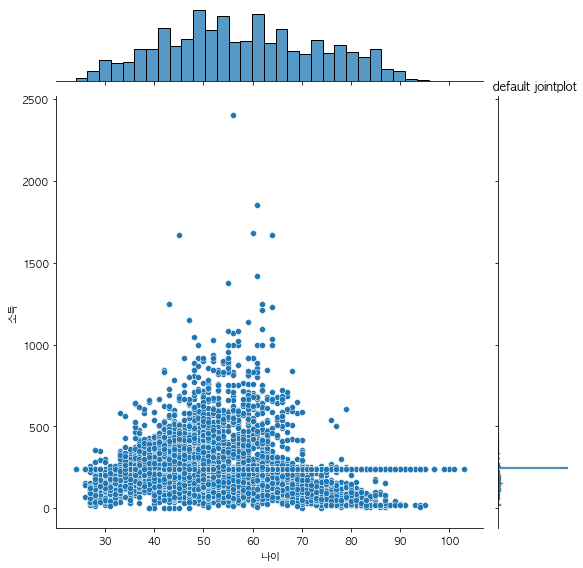

In [14]:
plt.figure()
sns.jointplot(x = '나이', y = '소득', data = welfare, height = 8)
plt.title('default jointplot')
plt.show()

- kind 옵션 사용(1)
    - 선형 관계를 위한 회귀선을 나타내기

<Figure size 432x288 with 0 Axes>

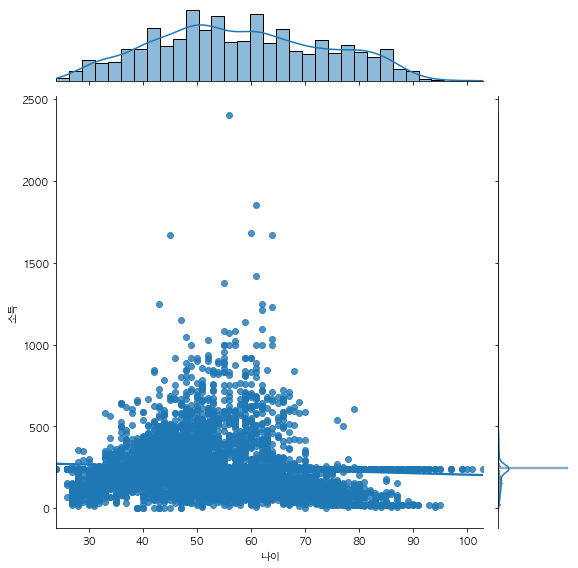

In [15]:
plt.figure()
sns.jointplot(x = '나이', y = '소득', data = welfare, height = 8, kind = 'reg')
plt.show()

- kind 옵션 사용(2)
    - 육각형 모양의 밀도를 확인해주는 그래프를 그리기

<Figure size 432x288 with 0 Axes>

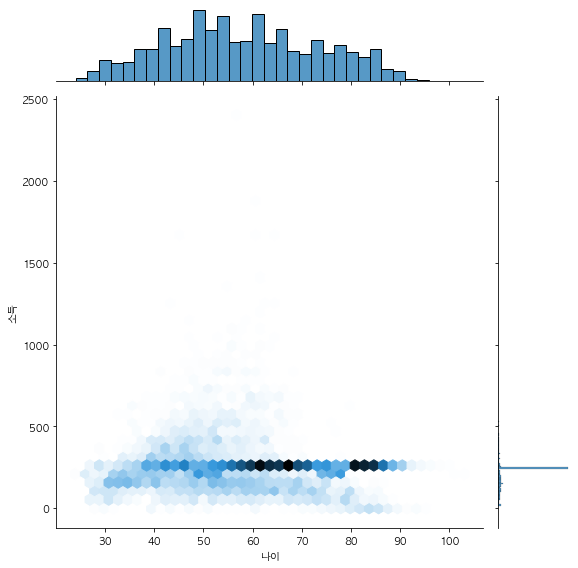

In [17]:
plt.figure()
sns.jointplot(x = '나이', y = '소득', data = welfare, height = 8, kind = 'hex')
plt.show()

- kind 옵션 사용(3)
    - 밀집도를 보다 부드러운 선으로 그리기

<Figure size 432x288 with 0 Axes>

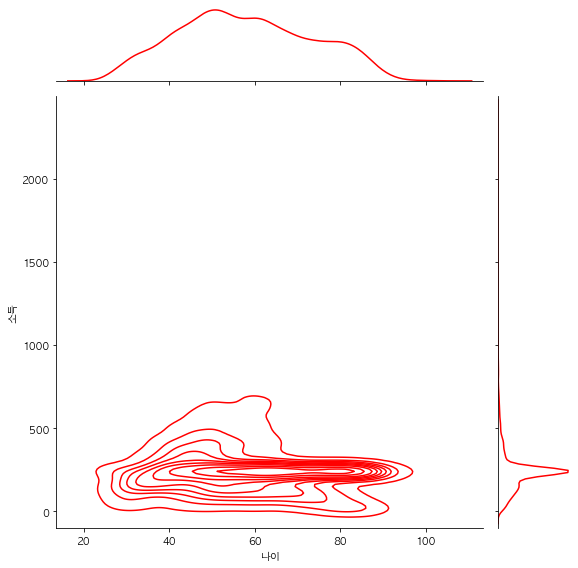

In [18]:
plt.figure()
sns.jointplot(x = '나이', y = '소득', data = welfare, height = 8, kind = 'kde', color = 'r')
plt.show()

### barplot
- barplot : 막대그래프
    - x, y : x축(범주형 데이터), y축(연속형 데이투)
    - data : 적용할 데이터 프레임
    - hue : 특성을 구분할 컬럼
    - errwidth : 에러 바의 두께 지정
    - estimator : 기본값은 평균(np.mean)

1. 성별에 따른 소득 그래프
- 기본값으로 그리기

Text(0, 0.5, '소득')

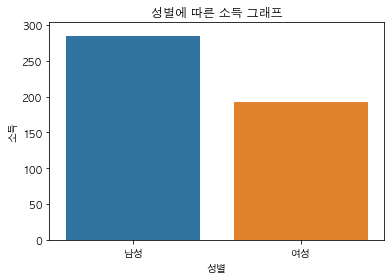

In [21]:
ax = plt.subplots()
ax = sns.barplot(x = '성별', y = '소득', data = welfare, errwidth = 0)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')

- hue 매개변수 사용
    - 종교유무에 따른 **다변량 그래프**

Text(0, 0.5, '소득')

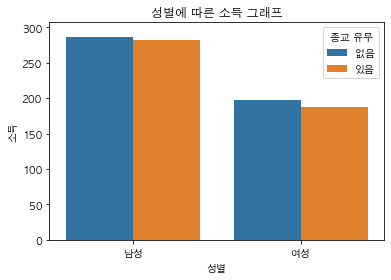

In [22]:
ax = plt.subplots()
ax = sns.barplot(x = '성별', y = '소득', data = welfare, hue = '종교 유무', errwidth = 0)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')

- **가로 막대 그래프**

Text(0.5, 0, '소득')

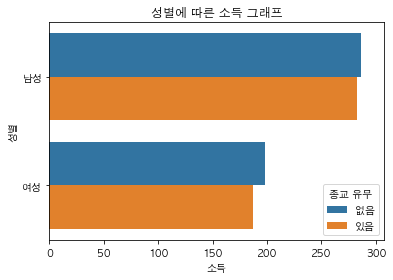

In [25]:
ax = plt.subplots()
ax = sns.barplot(y = '성별', x = '소득', data = welfare, hue = '종교 유무', errwidth = 0)
ax.set_title('성별에 따른 소득 그래프')
ax.set_ylabel('성별')
ax.set_xlabel('소득')

### baxplot
- baxplot : 상자 수염 그래프

1. 성별에 따른 소득 상자 수염 그래프
- 기본값으로 그리기

Text(0, 0.5, '소득')

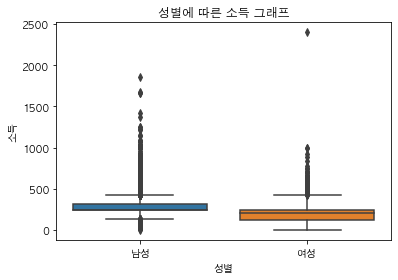

In [27]:
ax = plt.subplots()
ax = sns.boxplot(x = '성별', y = '소득', data = welfare)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')

- 이상치 제거하고 그리기
    - 소득이 400 이하인 행에 대해서 boxplot그리기

Text(0, 0.5, '소득')

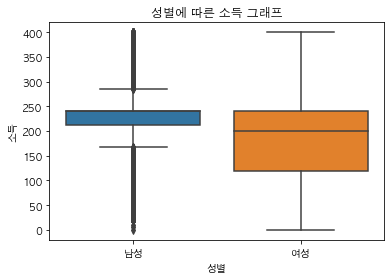

In [28]:
newwelfare = welfare.loc[welfare['소득']<=400]

ax = plt.subplots()
ax = sns.boxplot(x = '성별', y = '소득', data = newwelfare)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')

### kdeplot
- kdeplot : 이차원 밀집도
    - 히스토그램 같은 데이터의 분포를 smoothing하여 그려주는 기법
    - 이산화 되어 있는 변수를 연속적으로 보여줌
    - 항목
        - data : x축에 그려질 데이터
        - data2 : y축에 그려질 데이터
        - shade : True면 그림자 효과
        - color : 색상
        - label : 레이블 지정
        - alpha : 불투명도 지정

1. 소득에 따른 나이
- 그림자 효과 주기

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '나이')

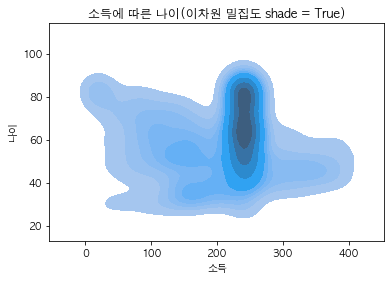

In [29]:
kde, ax = plt.subplots()
ax = sns.kdeplot(data = newwelfare['소득'], data2 = newwelfare['나이'], shade = True)
ax.set_title('소득에 따른 나이(이차원 밀집도 shade = True)')
ax.set_xlabel('소득')
ax.set_ylabel('나이')

- 그림자 효과 X

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '나이')

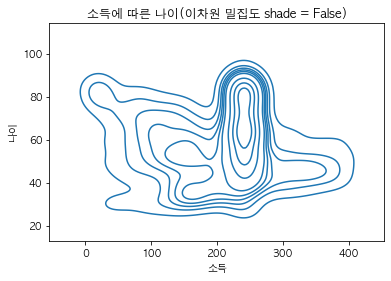

In [30]:
kde, ax = plt.subplots()
ax = sns.kdeplot(data = newwelfare['소득'], data2 = newwelfare['나이'], shade = False)
ax.set_title('소득에 따른 나이(이차원 밀집도 shade = False)')
ax.set_xlabel('소득')
ax.set_ylabel('나이')

### 2. 자동차 데이터셋
- manufacture : 제조사
- model : 모델
- displ : 엔진 크기
- year : 연식
- cyl : 실린더의 수
- trans : 변속기
- drv : 구동방식 (사륜(4), 전륜(f), 후륜(r))
- cty : gallon 당 도시 주행 마일 수
- hwy : gallon 당 고속도로 주행 마일 수
- fl : 
- class : 차의 크기

In [3]:
print(mpg.columns)
print(mpg.head())
print(mpg.describe())

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')
  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact
            displ         year         cyl         cty         hwy
count  234.000000   234.000000  234.000000  234.000000  234.000000
mean     3.471795  2003.500000    5.888889   16.858974   23.440171
std      1.291959     4.509646    1.611534    4.255946    5.954643
min      1.600000  1999.000000    4.000000    9.000000   12.000000
25%      2.400000  1999.000000    4.000000   14.000000   18.000000
50%  

### kdeplot + rugplot
- rugplot : 데이터의 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여줌

1. 엔진 크기에 따른 rug plot / kde 곡선

Text(0, 0.5, '값')

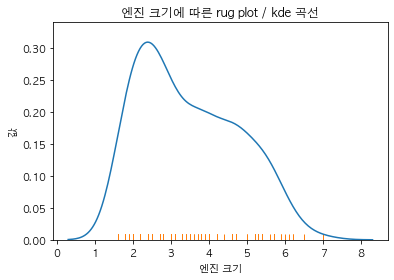

In [38]:
ax = plt.subplots()
sns.kdeplot(x = 'displ', data = mpg) # kde plot
ax = sns.rugplot(x = 'displ', data = mpg) # rug plot
ax.set_title('엔진 크기에 따른 rug plot / kde 곡선')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('값')

### scatterplot
- scatterplot : 산점도 그래프
    - x, y : 산점도의 x축, y축에 놓여질 데이터
    - data : 사용하고자 하는 데이터 셋
    - hue : 항목별로 다른 색상을 지정하고자 할 때
    - style : 그려질 모양 구분
    - s : marker size 구분

1. x축은 엔진의 크기(displ), y축은 도시 마일 수(cty)
- 산점도와 rug plot

Text(0, 0.5, '주행 마일 수')

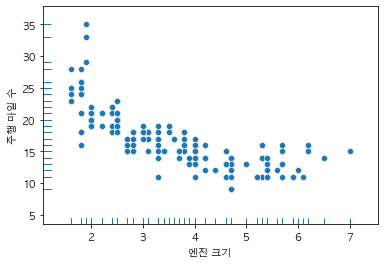

In [39]:
ax = plt.subplots()
sns.scatterplot(x = 'displ', y = 'cty', data = mpg) # scatter
ax = sns.rugplot(x = 'displ', y = 'cty', data = mpg) # rug plot
ax.set_xlabel('엔진 크기')
ax.set_ylabel('주행 마일 수')

### histplot
- histplot : 히스토그램
    - x : 히스토그램을 그릴 데이터 컬럼
    - data : 그리고자 하는 데이터 셋
    - kde : True면 커널 밀도 그래프를 동시에 그림
    - bins : x축에 보여지는 계급의 개수

1. 엔진 크기 히스토그램
- 커널 밀도 곡선과 함께 그리기

Text(0.5, 0, '엔진 크기')

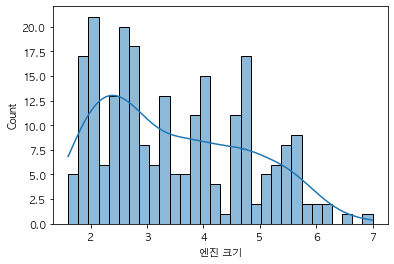

In [40]:
ax = plt.subplots()
ax = sns.histplot(x = 'displ', data = mpg, kde = True, bins = 30) 
ax.set_xlabel('엔진 크기')

### countplot
- countplot : 막대그래프
    - **범주형 데이터**의 개수를 세서 막대그래프로 표현

1. 구동 방식별 개수

In [41]:
label_dict = {'f':'전륜 구동', '4':'사륜 구동', 'r':'후륜구동'}
def setLabel(x):
    return label_dict[x]
mpg['drv'] = mpg['drv'].apply(setLabel)
result = mpg.groupby('drv')['drv'].count()
print(result)

drv
사륜 구동    103
전륜 구동    106
후륜구동      25
Name: drv, dtype: int64


Text(0.5, 0, '구동 방식')

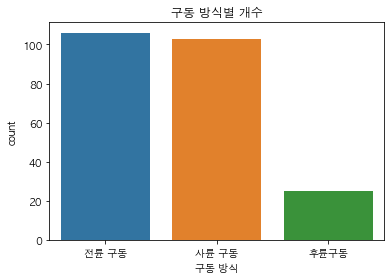

In [42]:
plt.figure()
ax = sns.countplot(x = 'drv', data = mpg)
ax.set_title('구동 방식별 개수')
ax.set_xlabel('구동 방식')

2. 실린더수에 따른 countplot

In [43]:
mpg.groupby('cyl')['cyl'].count()

cyl
4    81
5     4
6    79
8    70
Name: cyl, dtype: int64

Text(0.5, 0, '실린더 수')

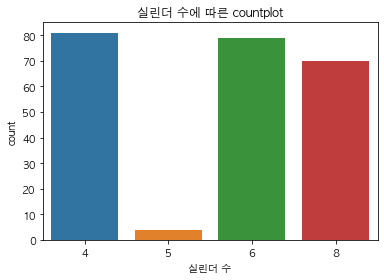

In [44]:
plt.figure()
ax = sns.countplot(x = 'cyl', data = mpg)
ax.set_title('실린더 수에 따른 countplot')
ax.set_xlabel('실린더 수')

### jointplot
- jointplot : 산점도와 히스토그램을 동시에 표현

1. 구동방식에 따른 고속도로 주행거리
- 기본적인 방식

<Figure size 432x288 with 0 Axes>

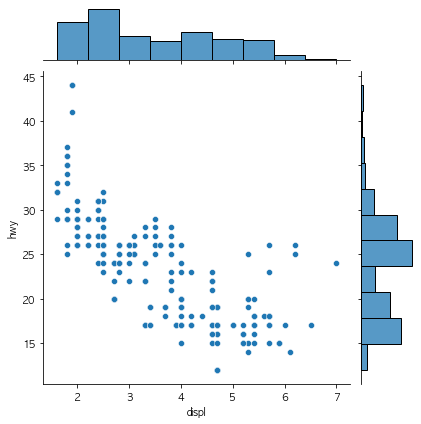

In [45]:
plt.figure()
sns.jointplot(x = 'displ', y='hwy', data = mpg)

- 커널 밀도 함수
    - kind 매개변수 사용

<Figure size 432x288 with 0 Axes>

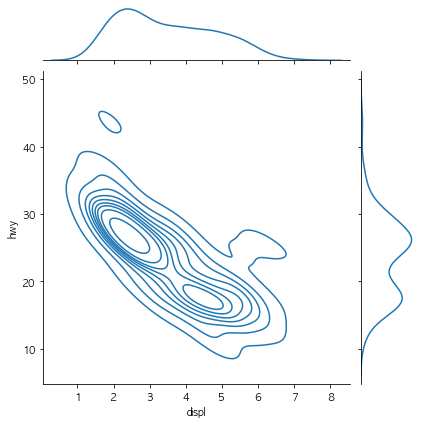

In [46]:
plt.figure()
sns.jointplot(x = 'displ', y='hwy', data = mpg, kind = 'kde')

### pairplot
- 단순히 data 매개 변수만 사용하는 경우 
    - 동일한 데이터가 만나는 대각선 영역 : 히스토그램
    - 서로 다른 데이터가 만나는 영역 : 산점도 그래프

1. 엔진의 크기('displ'), 실린더의 수('cyl'), 도시 주행 마일수('cty'), 고속도로 주행 마일수('hwy') 컬럼만 별도로 추출하여 표현

<Figure size 432x288 with 0 Axes>

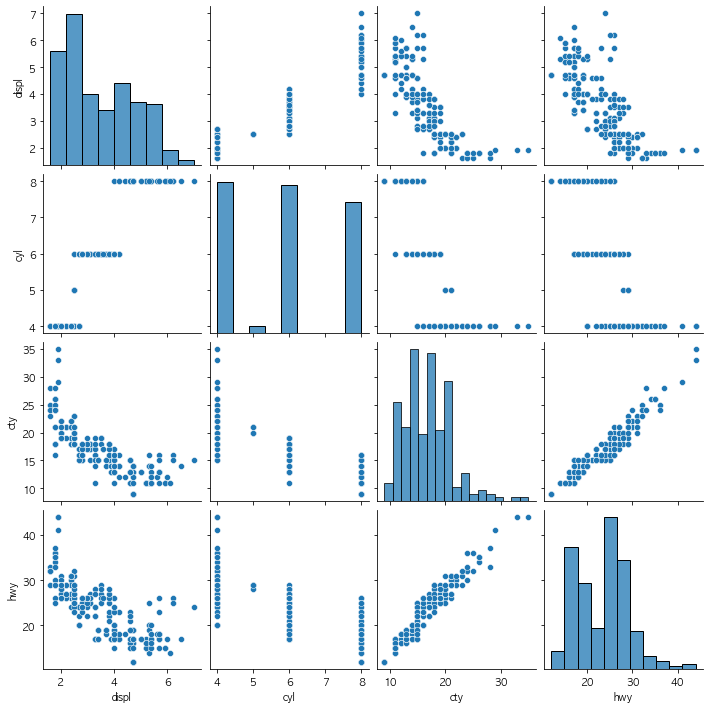

In [47]:
newmpg = mpg.loc[:, ['displ', 'cyl', 'cty', 'hwy']]

plt.figure()
ax = sns.pairplot(data=newmpg)

2. 실린더의 수를 이용하여 구분
- hue 옵션 사용

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

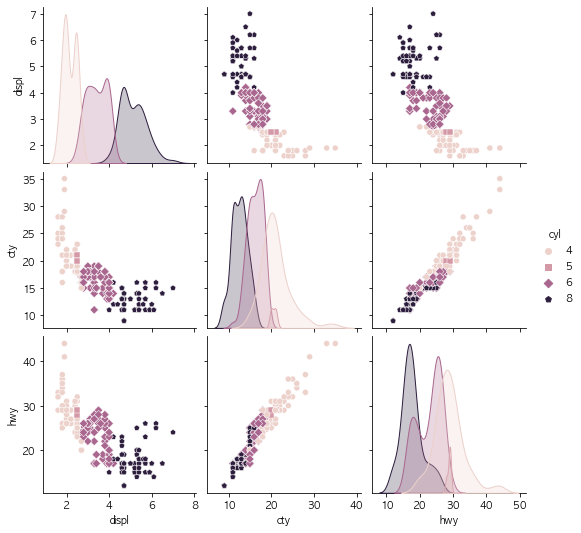

In [48]:
newmpg = mpg.loc[:, ['displ', 'cyl', 'cty', 'hwy']]

plt.figure()
ax = sns.pairplot(data=newmpg, hue = 'cyl', markers = ['o', 's', 'D', 'p'])

### heatmap
- heatmap : 데이터가 2차원이고, 모든 값이 카테고리의 값으로 구성되어 있는 경우
    - 1D 데이터를 2D로 바꾸기 위해 pivot_table 사용
    - 색상으로 표현할 수 있는 다양한 정보를 일정한 이미지 위에 표 형태로 출력
    - annot 매개변수 값이 True면, cell에 해당하는 수치 값 보여줌

1. 실린더의 수에 따른 구동 방식

In [50]:
# 1D data -> 2D data
mpg_size = mpg.pivot_table(index = 'drv', columns = 'cyl', aggfunc = 'size', fill_value = 0)
print(mpg_size)

cyl     4  5   6   8
drv                 
사륜 구동  23  0  32  48
전륜 구동  58  4  43   1
후륜구동    0  0   4  21


Text(32.0, 0.5, '구동 방식')

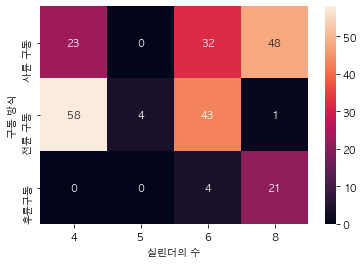

In [51]:
plt.figure()
ax = sns.heatmap(mpg_size, annot= True, fmt = '.2g')
ax.set_label('실린더의 수에 따른 구동 방식')
ax.set_xlabel('실린더의 수')
ax.set_ylabel('구동 방식')

### barplot
1. 구동 방식에 따른 주행 마일 수
- 에러 바의 너비는 0으로 지정

Text(0, 0.5, '주행 마일수')

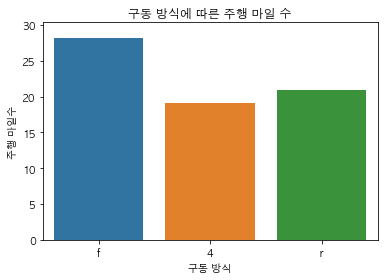

In [5]:
plt.figure()
ax = sns.barplot(x = 'drv', y = 'hwy', data = mpg, errwidth = 0)
ax.set_title('구동 방식에 따른 주행 마일 수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

- 실린더의 수를 이용하여 특성을 구분
    - hue 매개변수 사용

Text(0, 0.5, '주행 마일수')

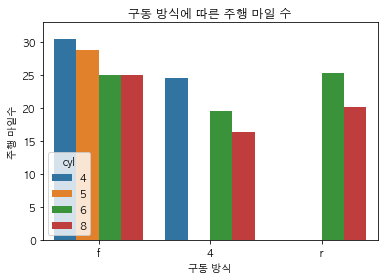

In [6]:
plt.figure()
ax = sns.barplot(x = 'drv', y = 'hwy', data = mpg, hue = 'cyl', errwidth = 0)
ax.set_title('구동 방식에 따른 주행 마일 수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

### boxplot
1. 구동 방식에 따른 주행 마일수의 통계치 정보를 이용하여 그래프 그리기

In [9]:
# 통계치 정보
drv_grouping = mpg.groupby('drv')['hwy']
drv_grouping.describe()

,count,mean,std,min,25%,50%,75%,max
drv,,,,,,,,
4,103.0,19.174757,4.078704,12.0,17.0,18.0,22.0,28.0
f,106.0,28.160377,4.206881,17.0,26.0,28.0,29.0,44.0
r,25.0,21.000000,3.662877,15.0,17.0,21.0,24.0,26.0


Text(0, 0.5, '주행 마일수')

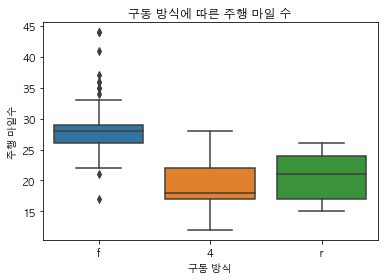

In [8]:
plt.figure()
ax = sns.boxplot(x = 'drv', y = 'hwy', data = mpg)
ax.set_title('구동 방식에 따른 주행 마일 수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

- 실린더의 수에 따라 상자 수염 그래프를 별도로 그리기
    - hue 매개변수 사용

Text(0, 0.5, '주행 마일수')

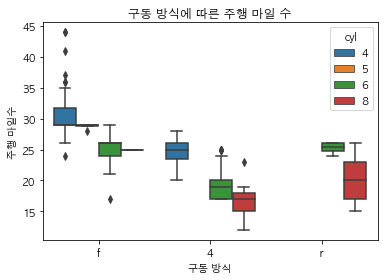

In [10]:
plt.figure()
ax = sns.boxplot(x = 'drv', y = 'hwy', data = mpg, hue = 'cyl')
ax.set_title('구동 방식에 따른 주행 마일 수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

### violinplot
1. 구동 방식에 따른 주행 마일수

Text(0, 0.5, '주행 마일수')

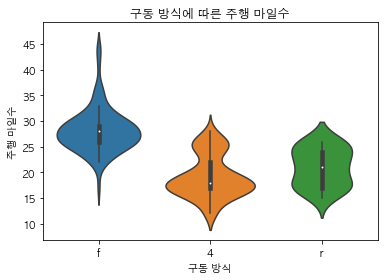

In [11]:
plt.figure()
ax = sns.violinplot(x = 'drv', y = 'hwy', data = mpg)
ax.set_title('구동 방식에 따른 주행 마일수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

- 실린더의 수에 따른 바이올린 그래프를 별도로 그리기
    - hue 옵션 사용

Text(0, 0.5, '주행 마일수')

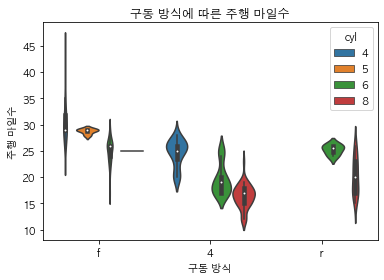

In [12]:
plt.figure()
ax = sns.violinplot(x = 'drv', y = 'hwy', data = mpg, hue = 'cyl')
ax.set_title('구동 방식에 따른 주행 마일수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

### stripplot
- stripplot : 일변량 데이터셋에 대하여 간략히 요약
    - **작은 데이터셋**을 다루는 용도로 사용됨
    - box 또는 violin 그래프의 보충적인 그래프로 사용
    - 항목
        - x, y : x축과 y축에 그려질 데이터
        - data : 데이터셋
        - hue : 특성 구분
        - dodge : hue 매개변수 사용시, dodge 매개변수의 값이 True면 범주형 데이터 축을 띠리서 데이터들을 분리
        - jitter : True면 데이터가 겹치지 않도록 함
        - size : 마커의 크기를 지정

1. 구동 방식에 따른 주행 마일수

Text(0, 0.5, '주행 마일수')

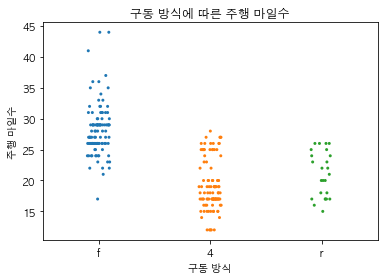

In [13]:
STRIP_SIZE = 3

plt.figure()
ax = sns.stripplot(x = 'drv', y = 'hwy', data = mpg, jitter = True, size = STRIP_SIZE)
# jitter = True 이므로 데이터들이 겹쳐서 보이지 않음
ax.set_title('구동 방식에 따른 주행 마일수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

- 실린더 개수에 따른 색상을 다르게 지정
    - hue 매개변수

Text(0, 0.5, '주행 마일수')

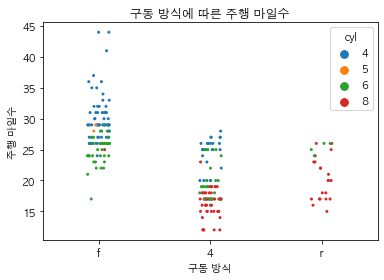

In [14]:
STRIP_SIZE = 3

plt.figure()
ax = sns.stripplot(x = 'drv', y = 'hwy', hue = 'cyl', data = mpg, jitter = True, size = STRIP_SIZE)
ax.set_title('구동 방식에 따른 주행 마일수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

- hue 매개변수에 의하여 지정된 값들이 서로 분리되어 표현
    - dodge 매개변수 사용

Text(0, 0.5, '주행 마일수')

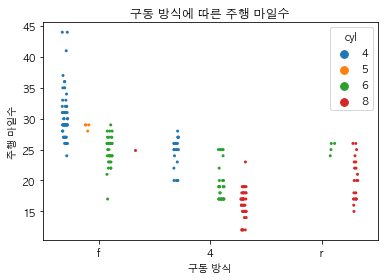

In [15]:
STRIP_SIZE = 3

plt.figure()
ax = sns.stripplot(x = 'drv', y = 'hwy', hue = 'cyl', data = mpg, jitter = True, dodge = True, size = STRIP_SIZE)
ax.set_title('구동 방식에 따른 주행 마일수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

### swarmplot
- swarmplot : stripplot와 유사하지만, 점들이 보정되어 서로 겹쳐지지 않음

1. 구동 방식에 따른 주행 마일수
- 기본

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '주행 마일수')

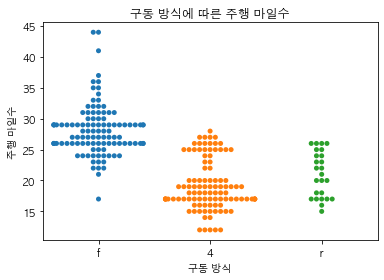

In [17]:
plt.figure()
ax = sns.swarmplot(x = 'drv', y = 'hwy', data = mpg)
ax.set_title('구동 방식에 따른 주행 마일수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

- 실린더의 개수에 따라서 서로 색상을 다르게 그림
    - hue 매개변수

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '주행 마일수')

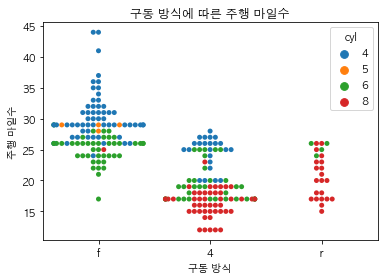

In [18]:
plt.figure()
ax = sns.swarmplot(x = 'drv', y = 'hwy', data = mpg, hue = 'cyl')
ax.set_title('구동 방식에 따른 주행 마일수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

- 실린더의 개수 별로 별도의 데이터로 분리해서 그리기
    - dodge 매개변수 사용

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '주행 마일수')

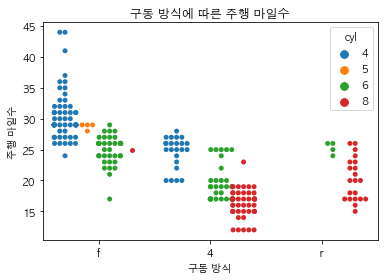

In [19]:
plt.figure()
ax = sns.swarmplot(x = 'drv', y = 'hwy', data = mpg, hue = 'cyl', dodge = True)
ax.set_title('구동 방식에 따른 주행 마일수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')

### boxpot + striplot

1. 구동 방식에 띠른 엔진크기에 대해 상자 수염 그래프와 stipplot 혼합

Text(0, 0.5, '구동 방식')

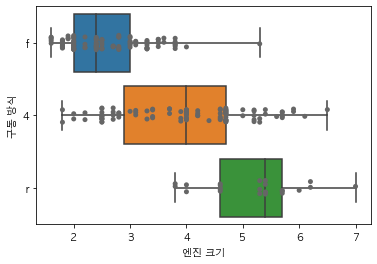

In [20]:
plt.figure()
sns.boxplot(x = 'displ', y = 'drv', data = mpg, whis = np.inf) # whis : upper/lower whisker
ax = sns.stripplot(x = 'displ', y = 'drv', data = mpg, jitter = True, color = '0.4') # 0: black, 1:white
ax.set_xlabel('엔진 크기')
ax.set_ylabel('구동 방식')

### violinplot + swarmplot

1. 구동방식에 따른 엔진크기를 violin plot과 swarm plot을 혼합해서 그리기

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '엔진 크기')

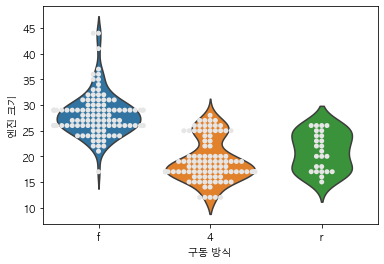

In [21]:
plt.figure()
sns.violinplot(x = 'drv', y = 'hwy', data = mpg, inner = None) 
ax = sns.swarmplot(x = 'drv', y = 'hwy', data = mpg, color = '0.9') # 0: black, 1:white
ax.set_xlabel('구동 방식')
ax.set_ylabel('엔진 크기')

### 연습 문제
- tip.csv file 사용

In [7]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
plt.rc('font', family='AppleGothic')
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.unicode_minus'] = False

CHART_NAME = '10주차_연습문제'
cnt, PNG, UNDERBAR = 0, '.png', '_'
filename = '../data/tips.csv'

In [16]:
# data load
tips = pd.read_csv(filename, encoding='utf-8', index_col=0)

# data print
print(tips.columns)
print('-'*30)

print(tips.head(10))
print('-'*30)

print(tips.describe())
print('-'*30)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
------------------------------
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
------------------------------
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%    

In [5]:
def FileSave():
    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + ' 파일이 저장되었습니다.')

In [8]:
total_bill = tips['total_bill'] # Series

print('total_bill.unique()')
print(total_bill.unique())
print(np.max(total_bill.unique()))
print(np.min(total_bill.unique()))

total_bill.unique()
[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 13.81 11.02 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07 26.86 25.28
 14.73 10.51 27.2  22.76 17.29 19.44 16.66 10.07 32.68 15.98 34.83 13.03
 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17 27.28 12.03 12.46
 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21 18.24 14.31 14.    7.25
 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08 11.69 13.42 14.26 15.95
 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27 11.17 12.26 18.26  8.51
 14.15 16.   13.16 17.47 34.3  41.19 27.05 16.43  8.35 18.64 11.87  9.78
  7.51 14.07 13.13 17.26 24.55 19.77 29.85 48.17 25.   13.39 16.49 21.5
 12.66 16.21 17.51 24.52 20.76 31

#### 1) 총 지급액에 띠른 팁 산점도와 rugplot

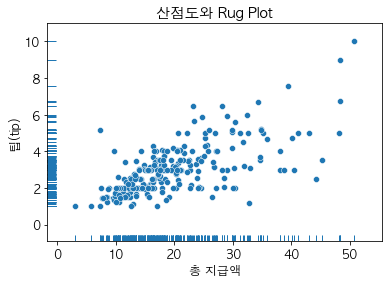

In [12]:
ax = plt.subplots()
sns.scatterplot(data=tips, x='total_bill', y='tip')
ax = sns.rugplot(data=tips, x='total_bill', y='tip') # 같은 축을 이용해서 그래프를 그림
ax.set_title('산점도와 Rug Plot')
ax.set_xlabel('총 지급액')
ax.set_ylabel('팁(tip)');
# FileSave()

#### 2) 총 지급액 히스토그램

Text(0, 0.5, '')

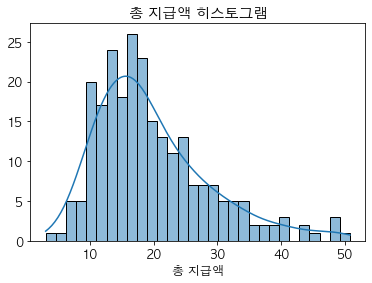

In [13]:
ax = plt.subplots()
ax = sns.histplot(data=tips, x='total_bill', kde=True, bins=30)
ax.set_title('총 지급액 히스토그램')
ax.set_xlabel('총 지급액')
ax.set_ylabel('')
# FileSave()

#### 3) 요일에 따른 팁 막대 그래프
- dinner와 launch 구분 :: hue 옵션 사용

In [17]:
print("tips['day'].unique()")
print(tips['day'].unique())

label_dict = {'Sun':'일요일', 'Sat':'토요일', 'Thur':'목요일', 'Fri':'금요일'}

def setLabel(x):
    return label_dict[x]

idx = 0 # 색상 구분을 위한 카운터 변수
tips['day'] = tips['day'].apply(setLabel) # 영어로 되어 있는 것을 한글로 바꿈

print('요일별 개수')
result = tips.groupby('day')['day'].count()
print(result)

print("tips['time'].unique()")
print(tips['time'].unique())

print('주간/야간 구분 개수')
result = tips.groupby('time')['time'].count()
print(result)

tips['day'].unique()
['Sun' 'Sat' 'Thur' 'Fri']
요일별 개수
day
금요일    19
목요일    62
일요일    76
토요일    87
Name: day, dtype: int64
tips['time'].unique()
['Dinner' 'Lunch']
주간/야간 구분 개수
time
Dinner    176
Lunch      68
Name: time, dtype: int64


Text(0, 0.5, '팁(tip)')

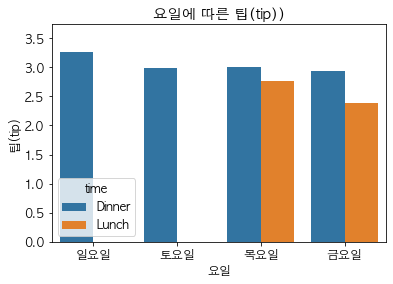

In [18]:
plt.figure()
ax = sns.barplot(x='day', y='tip', hue='time', data=tips, errwidth=0) # dinner와 lunch
ax.set_title("요일에 따른 팁(tip))")
ax.set_xlabel('요일')
ax.set_ylabel('팁(tip)')
# FileSave()

#### 4) 요일에 따른 팁 상자수염그래프(boxplot)

요일에 따른 따른 팁(tip)의 통계치 정보
     count      mean       std   min     25%    50%     75%    max
day                                                               
금요일   19.0  2.734737  1.019577  1.00  1.9600  3.000  3.3650   4.73
목요일   62.0  2.771452  1.240223  1.25  2.0000  2.305  3.3625   6.70
일요일   76.0  3.255132  1.234880  1.01  2.0375  3.150  4.0000   6.50
토요일   87.0  2.993103  1.631014  1.00  2.0000  2.750  3.3700  10.00


Text(0, 0.5, '팁(tip)')

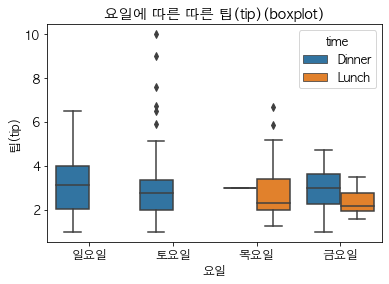

In [19]:
print('요일에 따른 따른 팁(tip)의 통계치 정보')
mygrouping = tips.groupby('day')['tip']
print(mygrouping.describe()) # 50% : Q2(median)
# describe의 max/min과 boxplot의 max/min의미는 다름
# boxplot의 min/max = IQR*1.5

plt.figure()
ax = sns.boxplot(x='day', y='tip', hue='time', data=tips)
ax.set_title('요일에 따른 따른 팁(tip)(boxplot)')
ax.set_xlabel('요일')
ax.set_ylabel('팁(tip)')
# FileSave()

#### 5) 요일에 따른 팁 violinplot

Text(0, 0.5, '팁(tip)')

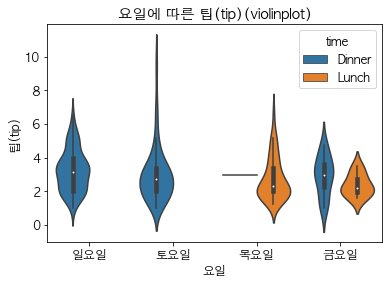

In [21]:
plt.figure()
ax = sns.violinplot(x='day', y='tip', hue='time', data=tips)
ax.set_title('요일에 따른 팁(tip)(violinplot)')
ax.set_xlabel('요일')
ax.set_ylabel('팁(tip)')
# FileSave()

#### 6) 요일에 따른 팁 stripplot

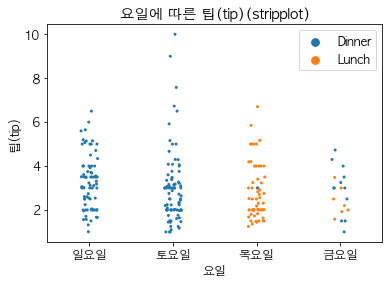

In [22]:
# UserWarning: 5.7% of the points cannot be placed;
# you may want to decrease the size of the markers or use stripplot.
STRIP_SIZE = 3

plt.figure()
ax = sns.stripplot(x='day', y='tip', hue='time', data=tips, jitter=True, size=STRIP_SIZE)
# jitter : 서로 겹치지 않도록
ax.set_title('요일에 따른 팁(tip)(stripplot)')
ax.set_xlabel('요일')
ax.set_ylabel('팁(tip)')
plt.legend(loc=1) # legend가 놓일 위치
# FileSave()

#### 7) 요일에 따른 팁 swarm plot

/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/eesun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


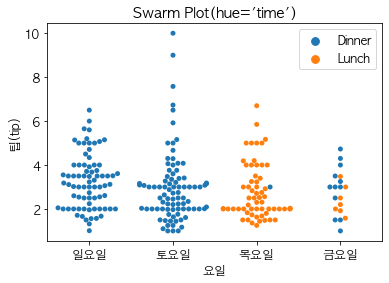

In [23]:
plt.figure()
ax = sns.swarmplot(x='day', y='tip', hue='time', data=tips)
ax.set_title("Swarm Plot(hue='time')")
ax.set_xlabel('요일')
ax.set_ylabel('팁(tip)')
plt.legend(loc=1)
# FileSave()

#### 8) 총 지급액에 따른 요일  box와 stirp plot 둘 다 그리기

Text(0, 0.5, '요일')

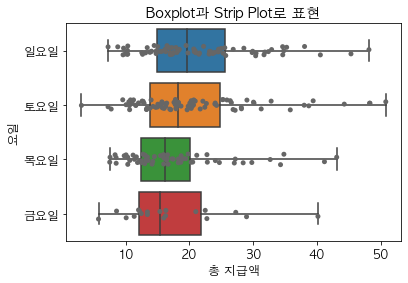

In [25]:
plt.figure()
sns.boxplot(x='total_bill', y='day', data=tips, whis=np.inf) # whis = np.inf :: outlier를 만들지 않음
ax = sns.stripplot(x='total_bill', y='day', data=tips, jitter=True, color="0.4") # color 0: black, 1: white
ax.set_title("Boxplot과 Strip Plot로 표현")
ax.set_xlabel('총 지급액')
ax.set_ylabel('요일')
# FileSave()